The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Started on: 2020-04-13 16:40:24


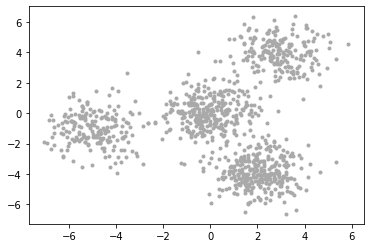

In [11]:
%load_ext autoreload
%autoreload 2

import time, datetime
import scipy.io
import matplotlib.pyplot as plt
from image_search import *
import numpy as np

num_clusters = 4
num_visual_words = 10000

print("Started on: {}".format(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")))

data = scipy.io.loadmat('data2d.mat')['data'].T

def plot_data(data):
    plt.scatter(data[:, 0], data[:, 1], color='darkgrey', marker='.')

plot_data(data)

[[ 2.90934205  3.97108298]
 [ 2.01142454 -3.88593535]
 [-4.93744921 -1.04516013]
 [-0.03634573  0.06470214]] (4, 2)
1244.7784687926492
K-Means computed in: 0.469s


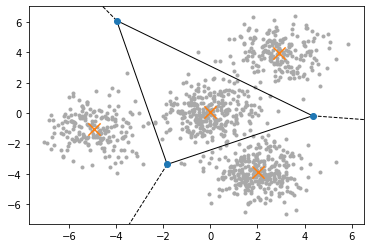

In [12]:
t = time.time()
means, distance_sum = kmeans(num_clusters, data)
print(means, means.shape)
print(distance_sum)
print("K-Means computed in: {:.3f}s".format(time.time() - t))

plt.figure()
plot_data(data)
plt.scatter(means[:, 0], means[:, 1], color='tab:orange', marker='x', s=150)
ax = plt.gca()

def plot_voronoi(ax):
    old_xlim = ax.get_xlim()
    old_ylim = ax.get_ylim()
    from scipy.spatial import Voronoi, voronoi_plot_2d
    vor = Voronoi(means)
    voronoi_plot_2d(vor, ax, show_points=False)
    ax.set_xlim(old_xlim)
    ax.set_ylim(old_ylim)

plot_voronoi(ax)

Nearest mean search done in 1.59e+09s


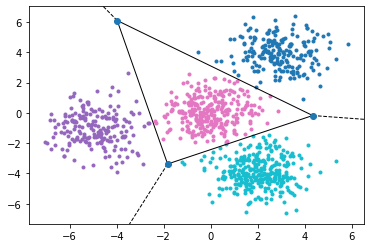

In [13]:
t = time.time()
labels, distances = nearest(means, data)
print("Nearest mean search done in {:.3}s".format(time.time()))

for label, color in zip(range(num_clusters), ['tab:blue', 'tab:cyan', 'tab:purple', 'tab:pink']):
    plt.scatter(data[labels==label, 0], data[labels==label, 1], c=color, marker='.')

plot_voronoi(plt.gca())
 

In [14]:

hessian_centers10k = scipy.io.loadmat('hess_centers10k.mat')['CX'].T
realdata = scipy.io.loadmat('realdata.mat') 
data = realdata['data'][0]  
labels = np.array([x[0] for x in realdata['lbls'][0]])

In [15]:
t = time.time()
db = create_db(labels, num_visual_words)
print("DB created in {:.3}s".format(time.time()-t))

# print('Lenghts of #2: {}, #18: {}, #30: %f\n', full([sum(DB(2,:).^2), sum(DB(18,:).^2), sum(DB(30,:).^2)]));
print('Lenghts of #2: {:.2f}, #18: {:.2f}, #30: {:.2f}'.format(
    (db[:, 1].toarray()**2).sum(), (db[:,17].toarray()**2).sum(), (db[:, 29].toarray()**2).sum())
)
second_img = db[:, 1].toarray()
weights = second_img[second_img > 0]
print('First 10 weights of the 2nd image {}'.format(weights[:10]))

# Expected results:
# Lenghts of #2: 1.00, #18: 1.00, #30: 1.00
# First 10 weights of the 2nd image [0.01720561 0.01720561 0.03441123 0.03441123 0.01720561 0.03441123
#  0.03441123 0.03441123 0.01720561 0.03441123]


DB created in 0.0872s
Lenghts of #2: 1.00, #18: 1.00, #30: 1.00
First 10 weights of the 2nd image [0.01720561 0.01720561 0.03441123 0.03441123 0.01720561 0.03441123
 0.03441123 0.03441123 0.01720561 0.03441123]


In [16]:
idf = np.ones((num_visual_words, 1))
for im_id in [1, 17, 29]:
    t = time.time()
    idxs, scores = query(db, labels[im_id], idf)
    print("query done in {:.3f}s".format(time.time()-t))
    print("Ordering with query #{}: {} ...".format(im_id, idxs[:10]))
    print("Scores with query #{}: {} ...".format(im_id, scores[:10]))

# Expected results:
# Ordering with query #1: [ 1  3  2  4  0  6 38 18 15  8] ...
# Scores with query #1: [1.         0.41454077 0.36248969 0.32113335 0.30047525 0.26458203
#  0.26048549 0.23940936 0.2281929  0.21324433] ...
# query done in 0.006s
# Ordering with query #17: [17 19 15 16 18 21 36 38 35 23] ...
# Scores with query #17: [1.         0.488779   0.48785903 0.47457137 0.40553172 0.3009667
#  0.28671491 0.28220734 0.27909532 0.276393  ] ...
# query done in 0.004s
# Ordering with query #29: [29 25 28 26 27 30 32 12 10  8] ...
# Scores with query #29: [1.         0.77617251 0.76642581 0.76578309 0.74120908 0.2370221
#  0.20867384 0.17483023 0.16542248 0.13262136] ...

query done in 0.004s
Ordering with query #1: [ 1  3  2  4  0  6 38 18 15  8] ...
Scores with query #1: [1.         0.41454077 0.36248969 0.32113335 0.30047525 0.26458203
 0.26048549 0.23940936 0.2281929  0.21324433] ...
query done in 0.005s
Ordering with query #17: [17 19 15 16 18 21 36 38 35 23] ...
Scores with query #17: [1.         0.488779   0.48785903 0.47457137 0.40553172 0.3009667
 0.28671491 0.28220734 0.27909532 0.276393  ] ...
query done in 0.003s
Ordering with query #29: [29 25 28 26 27 30 32 12 10  8] ...
Scores with query #29: [1.         0.77617251 0.76642581 0.76578309 0.74120908 0.2370221
 0.20867384 0.17483023 0.16542248 0.13262136] ...


In [17]:
idf = get_idf(labels, num_visual_words)

print('IDF weights of first 10 visual words: {}'.format(idf[:10]))
 
t = time.time()
db=create_db_tfidf(labels, num_visual_words, idf)
print ('Tfidf db created in {:.3}s'.format(time.time()-t))

print('Lenghts of #2: {:.2f}, #18: {:.2f}, #30: {:.2f}'.format(
    (db[:, 1].toarray()**2).sum(), (db[:,17].toarray()**2).sum(), (db[:, 29].toarray()**2).sum())
)

second_img = db[:, 1].toarray()
weights = second_img[second_img > 0]
print('First 10 weights of the 2nd image {}'.format(weights[:10]))

# Expected results:
# IDF weights of first 10 visual words: [[0.        ]
#  [1.49165488]
#  [2.59026717]
#  [1.49165488]
#  [2.59026717]
#  [2.30258509]
#  [2.59026717]
#  [1.74296931]
#  [1.89711998]
#  [1.49165488]]
# Tfidf db created in 0.0917s
# Lenghts of #2: 1.00, #18: 1.00, #30: 1.00
# First 10 weights of the 2nd image [0.02114542 0.01942724 0.02505479 0.03885449 0.01662608 0.03885449
#  0.04229083 0.02186477 0.01942724 0.03325216]


IDF weights of first 10 visual words: [[0.        ]
 [1.49165488]
 [2.59026717]
 [1.49165488]
 [2.59026717]
 [2.30258509]
 [2.59026717]
 [1.74296931]
 [1.89711998]
 [1.49165488]]
Tfidf db created in 0.0837s
Lenghts of #2: 1.00, #18: 1.00, #30: 1.00
First 10 weights of the 2nd image [0.02114542 0.01942724 0.02505479 0.03885449 0.01662608 0.03885449
 0.04229083 0.02186477 0.01942724 0.03325216]


In [18]:
for im_id in [1, 17, 29]:
    idf = np.ones((num_visual_words, 1))
    t = time.time()
    idxs, scores = query(db, labels[im_id], idf)
    print("query done in {:.3f}s".format(time.time()-t))
    print("Ordering with query #{}: {} ...".format(im_id, idxs[:10]))
    print("Scores with query #{}: {} ...".format(im_id, scores[:10]))

# with idf = np.ones((num_visual_words, 1)) you should get following. With idf = get_idf(labels, num_visual_words), 
#   you should get max score = 1.0
# Expected results:
# Ordering with query #1: [ 1  3  2  4  0  6 38 18 15 16] ...
# Scores with query #1: [0.94791945 0.35270807 0.30156876 0.2635144  0.24076235 0.22179365
#  0.21915386 0.20893068 0.20333552 0.18551524] ...
# query done in 0.006s
# Ordering with query #17: [17 15 19 16 18 21 31 36 38 35] ...
# Scores with query #17: [0.94763798 0.40451262 0.40104596 0.38776628 0.32864506 0.22977905
#  0.22949758 0.22775004 0.22145334 0.21935064] ...
# query done in 0.004s
# Ordering with query #29: [29 25 28 26 27 30 32 12 31 33] ...
# Scores with query #29: [0.96863615 0.75062597 0.7493514  0.73925355 0.71326389 0.26178122
#  0.23040533 0.12926027 0.12105814 0.11816718] ...


query done in 0.003s
Ordering with query #1: [ 1  3  2  4  0  6 38 18 15 16] ...
Scores with query #1: [0.94791945 0.35270807 0.30156876 0.2635144  0.24076235 0.22179365
 0.21915386 0.20893068 0.20333552 0.18551524] ...
query done in 0.006s
Ordering with query #17: [17 15 19 16 18 21 31 36 38 35] ...
Scores with query #17: [0.94763798 0.40451262 0.40104596 0.38776628 0.32864506 0.22977905
 0.22949758 0.22775004 0.22145334 0.21935064] ...
query done in 0.004s
Ordering with query #29: [29 25 28 26 27 30 32 12 31 33] ...
Scores with query #29: [0.96863615 0.75062597 0.7493514  0.73925355 0.71326389 0.26178122
 0.23040533 0.12926027 0.12105814 0.11816718] ...
